#Data Cleaning and Analysis of Job Postings for Grizzly Paths#

**Project Title:** Grizzly Paths

**Project Description**: Grizzly Paths is a project dedicated to IT students so they can see how skills they are learning or will learn in their courses will be relevant in job fields. By extracting information from datasets attained from Kaggle.com and from webscraping LinkedIn, Glassdoor, and Indeed, a useful tool can be created. Keywords and skills extracted from job titles, job industries, and job descriptions can be used to map those skills directly to the skills that are learned in various IT courses so students can set goals and attain the skills necessary to get a job in their respective fields.

##Data Cleaning and Analysis Process:

Loaded csvs team members (Nikhita and Lucas) attained via webscraping job posting websites Glassdoor, Indeed, and LinkedIn into a Google Colab notebook. Created a list of keywords based on skills demanded from job posting websites (featured in Spring 2023 data analysis work). Created graphs that display employment type such as full-time, part-time, internship, etc., counted the occurrences of keywords within job titles, job functions, and job industries. Created an extended list of keywords for each job summary/overview column to count how frequently each keyword (job skill) occurred in each job summary/overview column. n


##LinkedIn:

In [ ]:
# importing necessary libraries and tools

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from google.colab import files

# reading linkedin csv
df = pd.read_csv('linkedin.csv')

df.head()

,url,job_posting_id,job_title,company_name,company_id,job_location,job_summary,job_seniority_level,job_function,job_employment_type,...,discovery_input,apply_link,country_code,title_id,company_logo,job_posted_date,job_poster,application_availability,job_description_formatted,base_salary
0,https://www.linkedin.com/jobs/view/4129831164/...,4129831164,Software Developer - Driver and Vehicle,"Canadian Bank Note Company, Limited",718150,"Ottawa, Ontario, Canada",Description Internal Job Title : Software Deve...,Entry level,Engineering and Information Technology,Full-time,...,"{""experience_level"":null,""job_type"":null,""remo...",https://www.linkedin.com/jobs/view/externalApp...,NaN,9.0,"""https://media.licdn.com/dms/image/v2/C560BAQG...","""2025-01-22T05:23:25.270Z""","{""name"":null,""title"":null,""url"":null}",True,"<section class=""show-more-less-html"" data-max-...","{""currency"":null,""max_amount"":null,""min_amount..."
1,https://www.linkedin.com/jobs/view/4121271428/...,4121271428,API Developer,Venngo Inc.,126508,"Toronto, Ontario, Canada","Who we are At Venngo, we provide premium disco...",Associate,Engineering and Information Technology,Full-time,...,"{""experience_level"":null,""job_type"":null,""remo...",https://www.linkedin.com/jobs/view/externalApp...,NaN,9.0,"""https://media.licdn.com/dms/image/v2/C4D0BAQG...","""2025-01-17T16:23:26.269Z""","{""name"":null,""title"":null,""url"":null}",True,"<section class=""show-more-less-html"" data-max-...","{""currency"":null,""max_amount"":null,""min_amount..."
2,https://www.linkedin.com/jobs/view/4128604654/...,4128604654,.Net Developer,BLAZESOFT,9188224,"Vaughan, Ontario, Canada",Join our dynamic and innovative gaming company...,Mid-Senior level,Other,Full-time,...,"{""experience_level"":null,""job_type"":null,""remo...",https://www.linkedin.com/jobs/view/externalApp...,NaN,4384.0,"""https://media.licdn.com/dms/image/v2/D560BAQH...","""2025-01-18T16:24:35.693Z""","{""name"":null,""title"":null,""url"":null}",True,"<section class=""show-more-less-html"" data-max-...","{""currency"":null,""max_amount"":null,""min_amount..."
3,https://www.linkedin.com/jobs/view/4127880523/...,4127880523,Power BI Analyst,Alquemy Search & Consulting,3078066,"Calgary, Alberta, Canada","Power BI Analyst 12 month contract, potential ...",Mid-Senior level,Information Technology,Contract,...,"{""experience_level"":null,""job_type"":null,""remo...",NaN,NaN,2336.0,"""https://media.licdn.com/dms/image/v2/D560BAQG...","""2025-01-18T17:20:33.585Z""","{""name"":""Mat███unr███"",""title"":""Sr. I.T. Recru...",True,"<section class=""show-more-less-html"" data-max-...","{""currency"":""CA$"",""max_amount"":60,""min_amount""..."
4,https://www.linkedin.com/jobs/view/4049869381/...,4049869381,Scala Software Engineer - Backend,Avetta,7584447,Canada,Avetta is Hiring a Scala Software Engineer - B...,Mid-Senior level,Engineering and Information Technology,Full-time,...,"{""experience_level"":null,""job_type"":null,""remo...",https://www.linkedin.com/jobs/view/externalApp...,NaN,9.0,"""https://media.licdn.com/dms/image/v2/D560BAQH...","""2025-01-16T16:39:25.906Z""","{""name"":null,""title"":null,""url"":null}",True,"<section class=""show-more-less-html"" data-max-...","{""currency"":null,""max_amount"":null,""min_amount..."


In [ ]:
# dropping unnecessary columns
# creating new dataframe

new_df = df.drop(['url', 'job_posting_id', 'company_id', 'job_base_pay_range','company_url', 'job_posted_time', 'job_num_applicants','discovery_input','apply_link', 'country_code', 'title_id','company_logo', 'job_posted_date', 'job_poster', 'job_description_formatted','base_salary'
                  ], axis=1)

new_df.head()

,job_title,company_name,job_location,job_summary,job_seniority_level,job_function,job_employment_type,job_industries,application_availability
0,Software Developer - Driver and Vehicle,"Canadian Bank Note Company, Limited","Ottawa, Ontario, Canada",Description Internal Job Title : Software Deve...,Entry level,Engineering and Information Technology,Full-time,IT Services and IT Consulting,True
1,API Developer,Venngo Inc.,"Toronto, Ontario, Canada","Who we are At Venngo, we provide premium disco...",Associate,Engineering and Information Technology,Full-time,Marketing Services,True
2,.Net Developer,BLAZESOFT,"Vaughan, Ontario, Canada",Join our dynamic and innovative gaming company...,Mid-Senior level,Other,Full-time,Gambling Facilities and Casinos,True
3,Power BI Analyst,Alquemy Search & Consulting,"Calgary, Alberta, Canada","Power BI Analyst 12 month contract, potential ...",Mid-Senior level,Information Technology,Contract,Equipment Rental Services,True
4,Scala Software Engineer - Backend,Avetta,Canada,Avetta is Hiring a Scala Software Engineer - B...,Mid-Senior level,Engineering and Information Technology,Full-time,IT Services and IT Consulting,True


In [ ]:
#downloading cleaned dataframe to csv

new_df.to_csv('linkedin_cleaned.csv', index=False)
files.download('linkedin_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

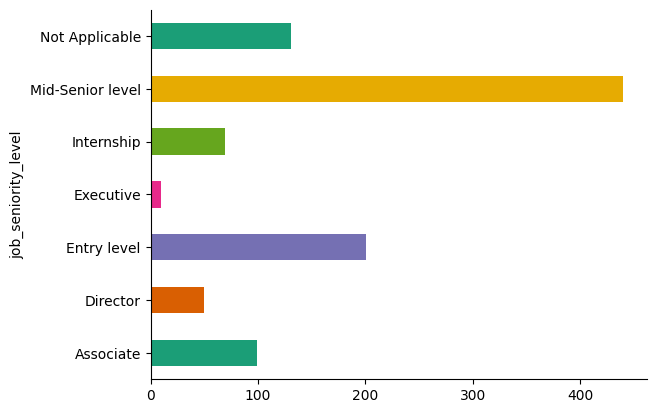

In [ ]:
# generated graph depending on employment type

from matplotlib import pyplot as plt
import seaborn as sns
new_df.groupby('job_seniority_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The following graph displays how often keywords such as engineer, analyst, etc. appear in LinkedIn job titles

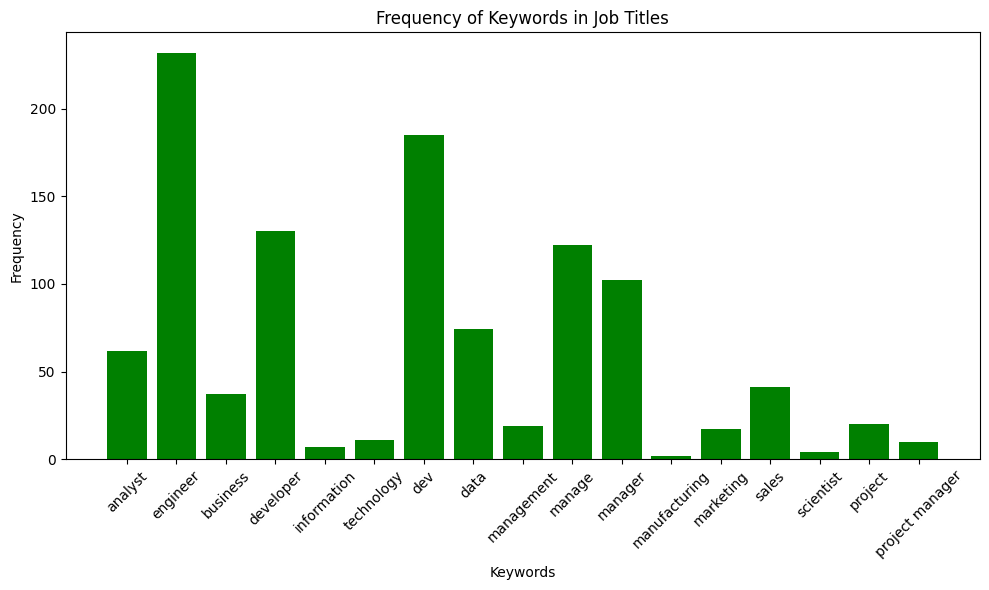

In [ ]:
# list of keywords to search for
keywords = ["analyst", "engineer", "business", "developer", "information", "technology", "dev", "data", "management", "manage", "manager", "manufacturing", "marketing", "sales", "scientist", "project", "project manager"]

# count the occurrences of each keyword in the 'job_title' column
keyword_counts = {keyword: new_df['job_title'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords}

# convert the counts dictionary to a DataFrame for visualization
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(keyword_df['Keyword'], keyword_df['Count'], color='green')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Job Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


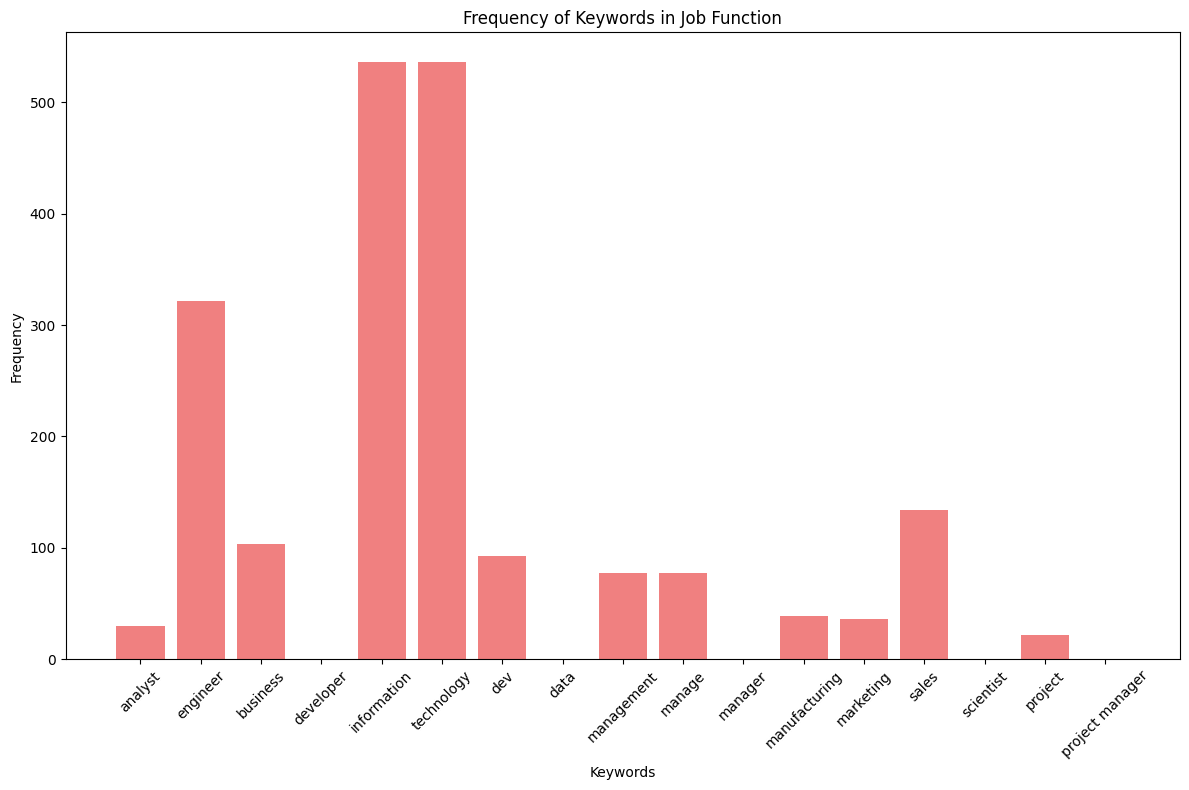

In [ ]:
# count the occurrences of each keyword in the 'job_function' column
keyword_counts_function = {
    keyword: new_df['job_function'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords
}

# convert the counts dictionary to a DataFrame for visualization
keyword_function_df = pd.DataFrame(list(keyword_counts_function.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(12, 8))
plt.bar(keyword_function_df['Keyword'], keyword_function_df['Count'], color='lightcoral')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Job Function')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


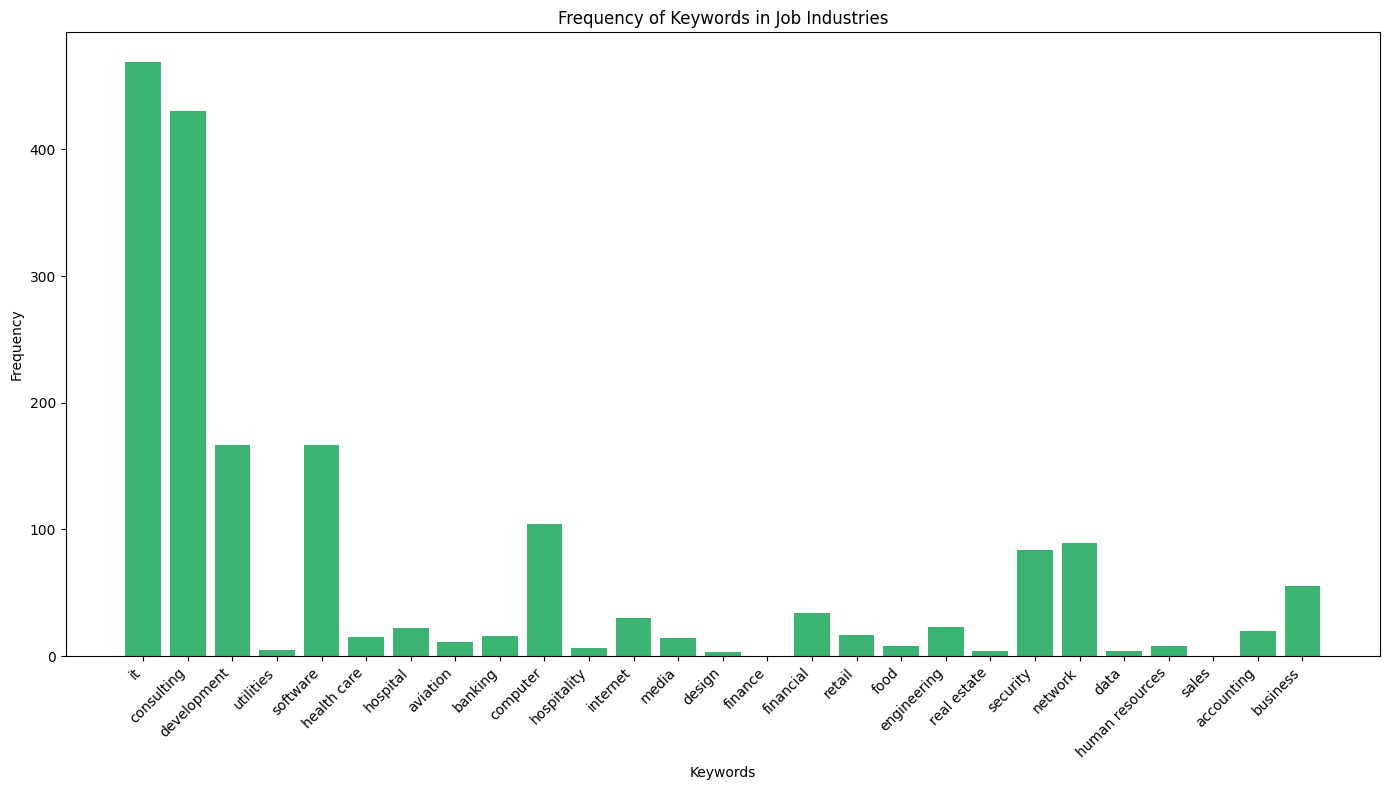

In [ ]:
# extended list of keywords for the job_industries column
industry_keywords = [
    "it", "consulting", "development", "utilities", "software", "health care", "hospital",
    "aviation", "banking", "computer", "hospitality", "internet", "media", "design",
    "finance", "financial", "retail", "food", "engineering", "real estate", "security", "network", "data", "human resources", "sales", "accounting", "business"
]

# count the occurrences of each keyword in the 'job_industries' column
keyword_counts_industries = {
    keyword: new_df['job_industries'].str.contains(keyword, case=False, na=False).sum() for keyword in industry_keywords
}

# convert the counts dictionary to a DataFrame for visualization
keyword_industries_df = pd.DataFrame(list(keyword_counts_industries.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(keyword_industries_df['Keyword'], keyword_industries_df['Count'], color='mediumseagreen')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Job Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



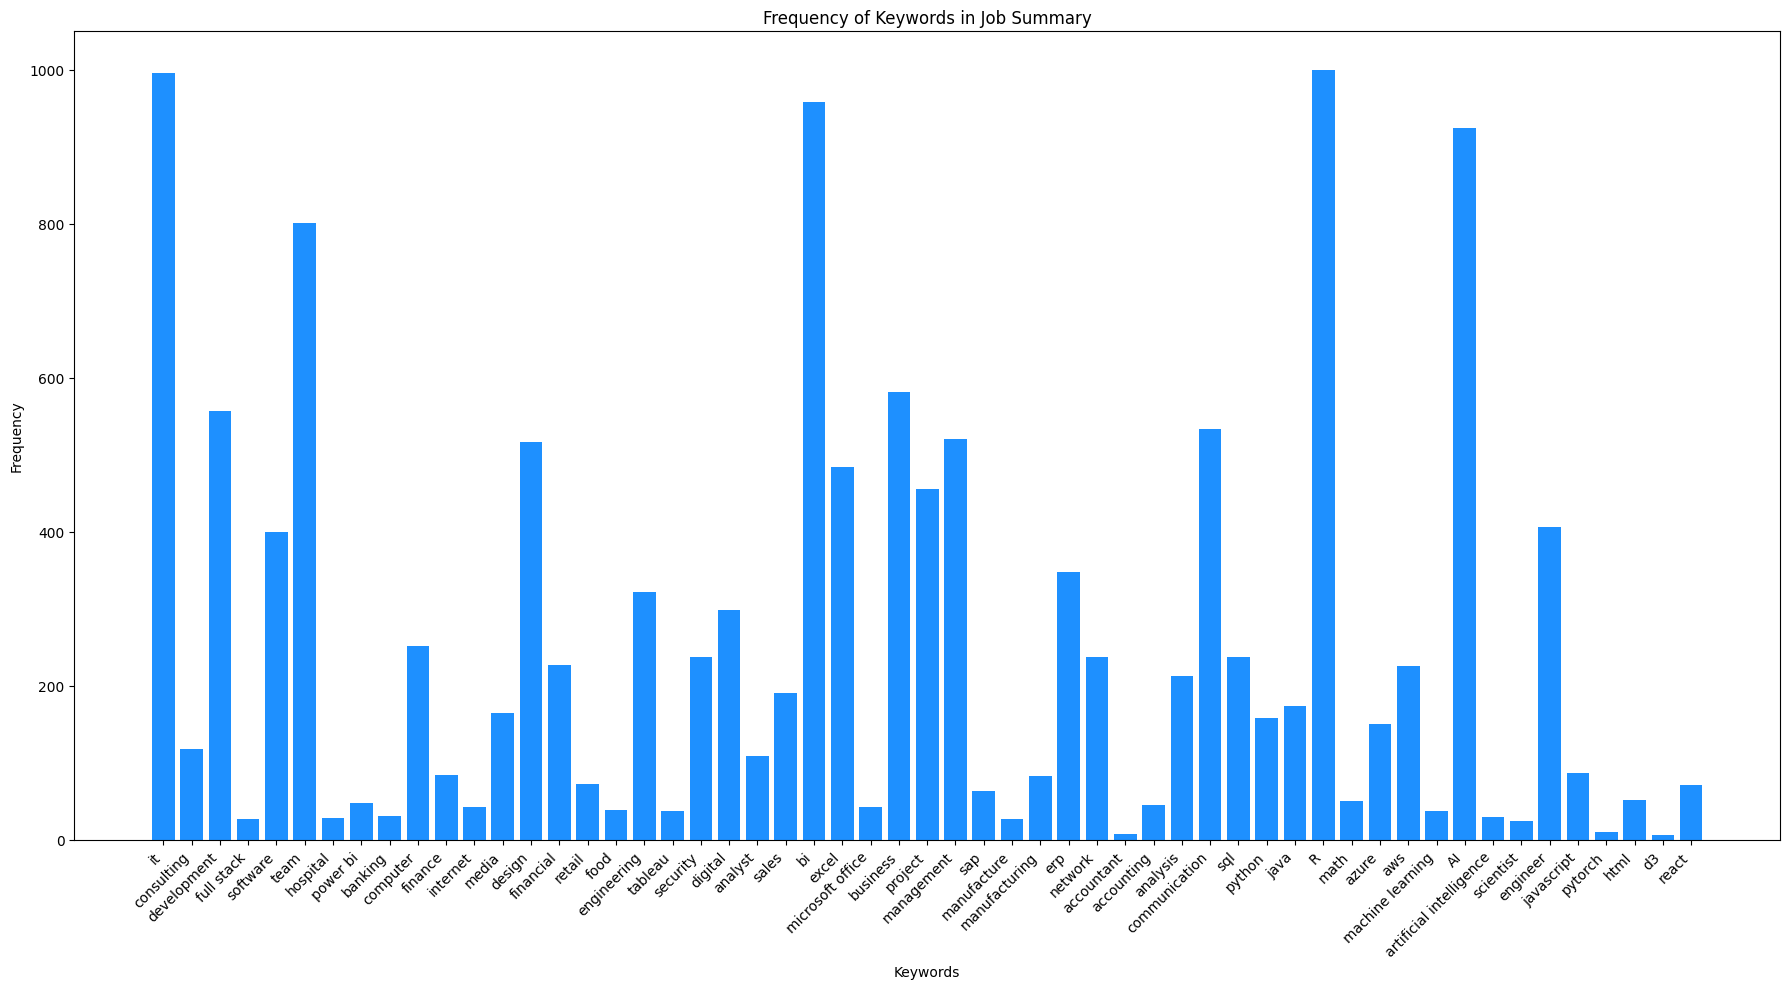

In [ ]:
# extended list of keywords for the job_summary column
summary_keywords = [
    "it", "consulting", "development", "full stack", "software", "team", "hospital",
    "power bi", "banking", "computer", "finance", "internet", "media", "design",
    "finance", "financial", "retail", "food", "engineering", "tableau", "security", "digital", "analyst", "sales", "bi", "excel", "microsoft office", "analyst", "business", "project", "management",
    "sap", "manufacture", "manufacturing", "erp", "network", "accountant", "accounting", "analysis", "communication", "sql", "python", "java", "R", "math", "azure", "aws", "machine learning", "AI",
    "artificial intelligence", "scientist", "engineer", "javascript", "pytorch", "html", "d3", "react"
]

# count the occurrences of each keyword in the 'job_summary' column
keyword_counts_summary = {
    keyword: new_df['job_summary'].str.contains(keyword, case=False, na=False).sum() for keyword in summary_keywords
}

# convert the counts dictionary to a DataFrame for visualization
keyword_summary_df = pd.DataFrame(list(keyword_counts_summary.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(18, 10))
plt.bar(keyword_summary_df['Keyword'], keyword_summary_df['Count'], color='dodgerblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Job Summary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##Indeed.com

In [ ]:
# importing necessary libraries and tools

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# reading indeed csv
indeed_df = pd.read_csv('indeed.csv')

indeed_df.head()

,jobid,company_name,date_posted_parsed,job_title,description_text,benefits,job_type,location,salary_formatted,company_rating,company_reviews_count,country,date_posted,description,company_link,domain,apply_link,url,is_expired,timestamp
0,9637227804139a43,Memorial Care,"""2025-01-21T14:20:02.000Z""","Program Coord, Professionalism","Title: Coord, Professionalism Program\n Loc...","[""Health insurance""]",Full-time,"Long Beach, CA 90806",$41.87 - $60.73 an hour,3.8,321,US,1 day ago,"Title: Coord, Professionalism Program\n ...",https://www.indeed.com/cmp/Memorialcare?campai...,https://www.indeed.com,https://www.indeed.com/rc/clk?jk=9637227804139...,https://www.indeed.com/rc/clk?jk=9637227804139...,False,2025-01-22 00:00:00.000
1,62b3047904eb4bcf,Fieldpiece Instruments,"""2025-01-22T18:41:06.004Z""",Recruiting Coordinator,Fieldpiece is hiring an organized and proactiv...,"[""401(k) 4% Match"",""401(k) matching"",""Employee...",Full-time,"1636 West Collins Avenue, Orange, CA 92867",$24 - $33 an hour,3.2,6,US,Just posted,Fieldpiece is hiring an organized and proacti...,https://www.indeed.com/cmp/Fieldpiece-Instrume...,https://www.indeed.com,https://www.indeed.com/rc/clk?jk=62b3047904eb4...,https://www.indeed.com/rc/clk?jk=62b3047904eb4...,False,2025-01-22 00:00:00.000
2,e67ac9867cd1117d,Best Buy,"""2025-01-22T18:07:16.942Z""",Retail Warehouse Associate,"As a Retail Warehouse Associate, you’ll be par...","[""Employee discount""]",Part-time,"3410 Alpine Avenue NW, Grand Rapids, MI 49544",$15.00 - $17.88 an hour,3.8,38563,US,Just posted,"As a Retail Warehouse Associate, you’ll be ...",https://www.indeed.com/cmp/Best-Buy?campaignid...,https://www.indeed.com,https://www.indeed.com/viewjob?viewtype=embedd...,https://www.indeed.com/viewjob?viewtype=embedd...,False,2025-01-22 00:00:00.000
3,e9521d0b67b89857,Nordstrom Inc,"""2025-01-22T18:07:16.300Z""",Maintenance Technician 2 - Topanga Plaza,Job Description JOB SUMMARY The Maintenance T...,"[""Dental insurance"",""Disability insurance"",""Em...",Full-time,"Thousand Oaks, CA",$23.75 - $41.25 an hour,3.8,17686,US,Just posted,Job Description JOB SUMMARY The Maintenance ...,https://www.indeed.com/cmp/Nordstrom?campaigni...,https://www.indeed.com,https://www.indeed.com/viewjob?viewtype=embedd...,https://www.indeed.com/viewjob?viewtype=embedd...,False,2025-01-22 00:00:00.000
4,3b2ffa6e6daf278f,CommonSpirit Health,"""2025-01-21T13:54:51.000Z""",HR Business Partner,Requisition ID 2024-385471\n Employme...,"[""401(k)"",""403(b)"",""Dental insurance"",""Health ...",Full-time,"1401 SOUTH GRAND AVENUE, Los Angeles, CA 90015",$35.13 - $50.94 an hour,3.6,2242,US,1 day ago,Requisition ID 2024-385471\n ...,https://www.indeed.com/cmp/Commonspirit-Health...,https://www.indeed.com,https://www.indeed.com/rc/clk?jk=3b2ffa6e6daf2...,https://www.indeed.com/rc/clk?jk=3b2ffa6e6daf2...,False,2025-01-22 00:00:00.000


In [ ]:
# dropping unnecessary columns from indeed dataset
# creating new dataframe f

new_indeed = indeed_df.drop(['jobid', 'date_posted_parsed', 'description_text','benefits', 'location', 'salary_formatted','company_rating', 'company_reviews_count', 'country',
                             'country', 'date_posted', 'company_link', 'domain', 'apply_link', 'url', 'is_expired', 'timestamp'], axis=1)
new_indeed.head()

,company_name,job_title,job_type,description
0,Memorial Care,"Program Coord, Professionalism",Full-time,"Title: Coord, Professionalism Program\n ..."
1,Fieldpiece Instruments,Recruiting Coordinator,Full-time,Fieldpiece is hiring an organized and proacti...
2,Best Buy,Retail Warehouse Associate,Part-time,"As a Retail Warehouse Associate, you’ll be ..."
3,Nordstrom Inc,Maintenance Technician 2 - Topanga Plaza,Full-time,Job Description JOB SUMMARY The Maintenance ...
4,CommonSpirit Health,HR Business Partner,Full-time,Requisition ID 2024-385471\n ...


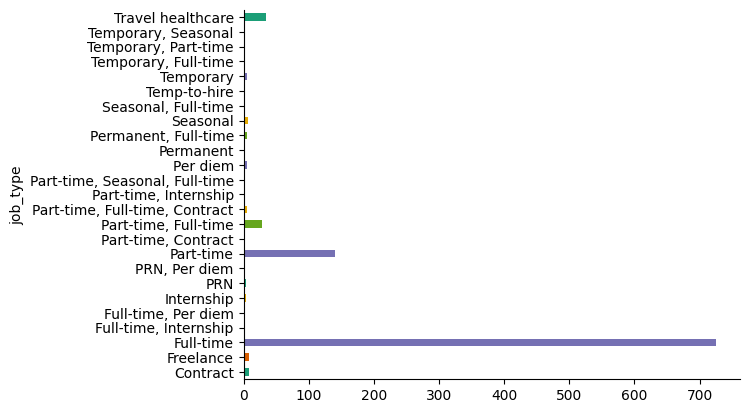

In [ ]:
# generated graph depending on employment type

from matplotlib import pyplot as plt
import seaborn as sns
new_indeed.groupby('job_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#downloading cleaned dataframe to csv

new_indeed.to_csv('indeed_cleaned.csv', index=False)
files.download('indeed_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

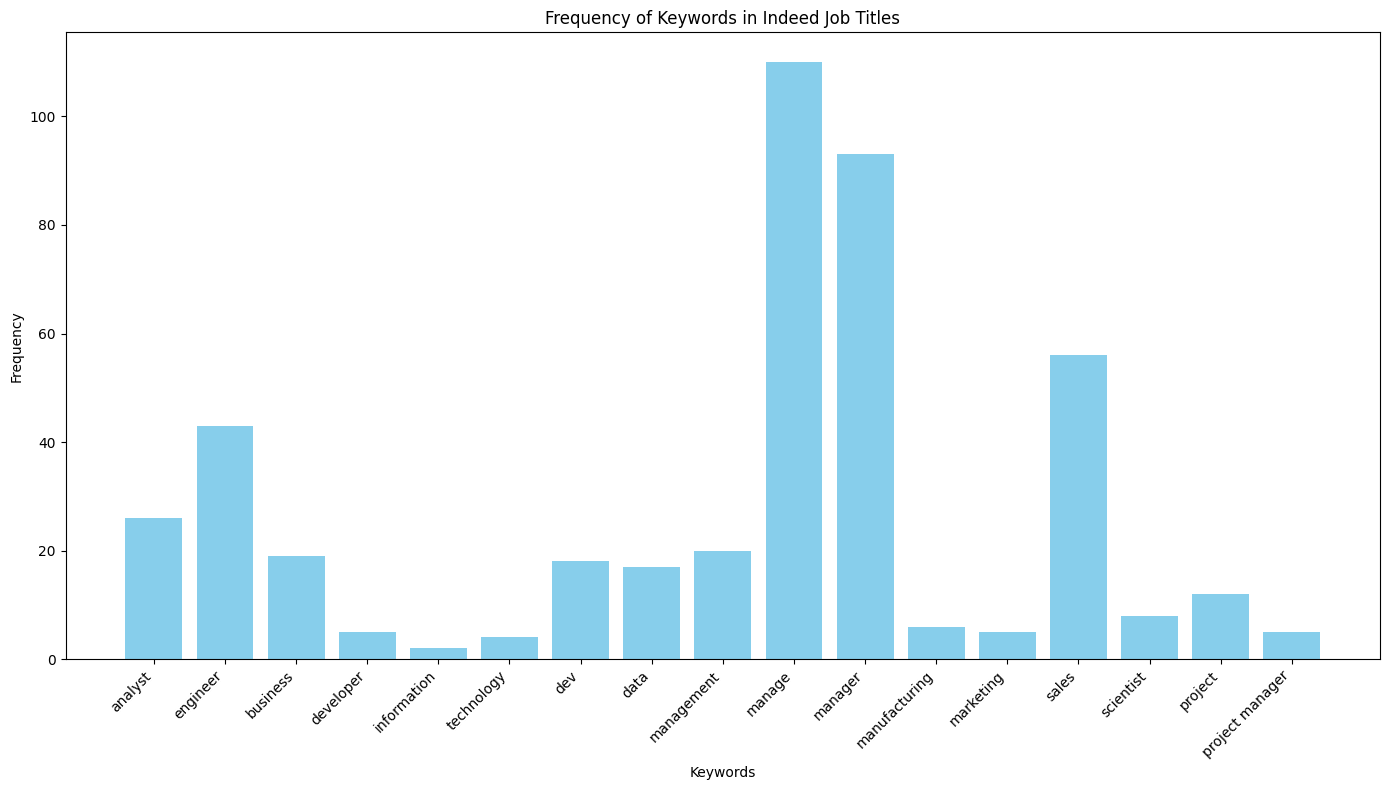

In [ ]:
# list of keywords
indeed_keywords = [
    "analyst", "engineer", "business", "developer", "information", "technology",
    "dev", "data", "management", "manage", "manager", "manufacturing", "marketing",
    "sales", "scientist", "project", "project manager"
]

# count the occurrences of each keyword in the 'job_title' column of the Indeed dataset
keyword_counts_indeed = {
    keyword: new_indeed['job_title'].str.contains(keyword, case=False, na=False).sum() for keyword in indeed_keywords
}

# convert the counts dictionary to a DataFrame for visualization
keyword_indeed_df = pd.DataFrame(list(keyword_counts_indeed.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(keyword_indeed_df['Keyword'], keyword_indeed_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Indeed Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


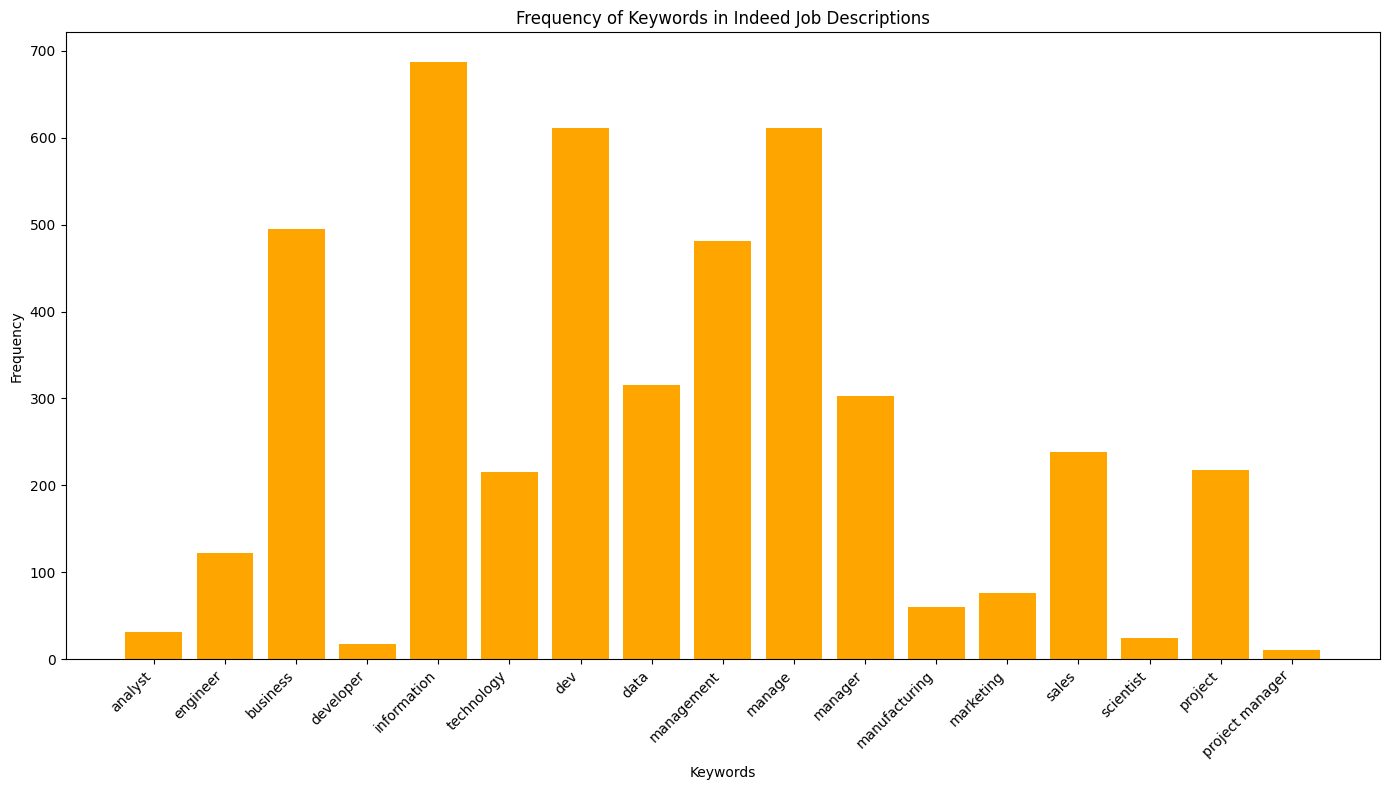

In [ ]:
#cCount the occurrences of each keyword in the 'description' column of the Indeed dataset
keyword_counts_description = {
    keyword: new_indeed['description'].str.contains(keyword, case=False, na=False).sum() for keyword in indeed_keywords
}

# convert the counts dictionary to a DataFrame for visualization
keyword_description_df = pd.DataFrame(list(keyword_counts_description.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(keyword_description_df['Keyword'], keyword_description_df['Count'], color='orange')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Indeed Job Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

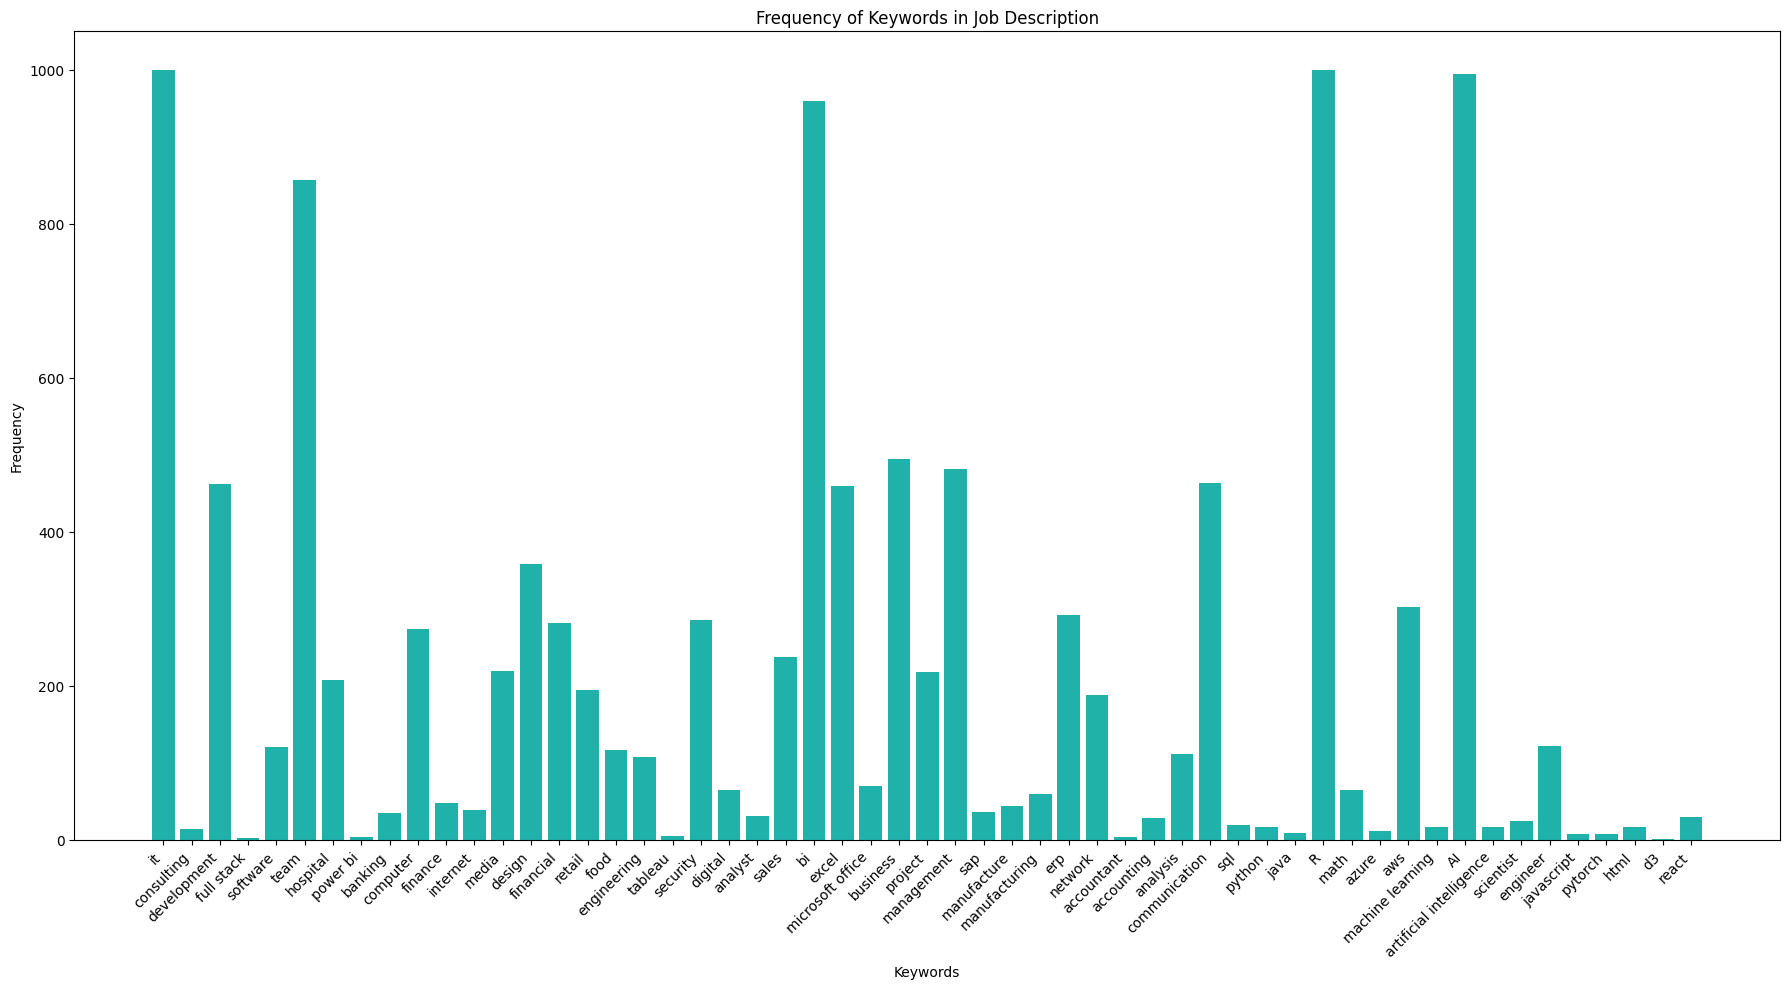

In [ ]:
# extended list of keywords for the description column
description_keywords_ext = [
    "it", "consulting", "development", "full stack", "software", "team", "hospital",
    "power bi", "banking", "computer", "finance", "internet", "media", "design",
    "finance", "financial", "retail", "food", "engineering", "tableau", "security", "digital", "analyst", "sales", "bi", "excel", "microsoft office", "analyst", "business", "project", "management",
    "sap", "manufacture", "manufacturing", "erp", "network", "accountant", "accounting", "analysis", "communication", "sql", "python", "java", "R", "math", "azure", "aws", "machine learning", "AI",
    "artificial intelligence", "scientist", "engineer", "javascript", "pytorch", "html", "d3", "react"
]

# count the occurrences of each keyword in the 'job_summary' column
keyword_counts_desc = {
    keyword: new_indeed['description'].str.contains(keyword, case=False, na=False).sum() for keyword in description_keywords_ext
}

# convert the counts dictionary to a DataFrame for visualization
keyword_desc_df = pd.DataFrame(list(keyword_counts_desc.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(18, 10))
plt.bar(keyword_desc_df['Keyword'], keyword_desc_df['Count'], color='lightseagreen')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Job Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Glassdoor

In [ ]:
# reading glassdoor csv

glassdoor_df = pd.read_csv('glassdoor.csv')

glassdoor_df.head()

,url,company_url_overview,company_name,company_rating,job_title,job_location,job_overview,company_headquarters,company_founded_year,company_industry,...,company_id,job_application_link,company_website,pay_range_glassdoor_est,pay_median_glassdoor,pay_range_employer_est__DUPLICATE__DUPLICATE,pay_median_employer,pay_range_currency,pay_type,discovery_input
0,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}
1,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Data Engineer, Go-to-Market","San Francisco, CA",The application window will be open until at l...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}
2,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Legal Specialist, Employment Litigation","Austin, TX",Minimum qualifications:\n\nBachelor's degree o...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}
3,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Customer Engineer II, Infrastructure Moderniza...","Charlotte, NC",Note: Googleâ€™s hybrid workplace includes rem...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}
4,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}


In [ ]:
# dropping unnecessary columns and creating new dataframe

new_glassdoor = glassdoor_df.drop(['url', 'company_url_overview', 'company_rating', 'job_location','company_headquarters', 'company_founded_year','company_revenue', 'company_size', 'percentage_that_recommend_company_to_a friend', 'percentage_that_approve_of_ceo',
                                   'company_ceo', 'company_career_opportunities_rating', 'company_comp_and_benefits_rating', 'company_culture_and_values_rating', 'company_senior_management_rating', 'company_work/life_balance_rating', 'reviews_by_same_job_pros', 'reviews_by_same_job_cons',
                                   'company_benefits_rating', 'company_benefits_employer_summary', 'employee_benefit_reviews', 'job_posting_id', 'company_id', 'job_application_link', 'company_website', 'pay_range_glassdoor_est', 'pay_median_glassdoor',
                                   'pay_range_employer_est__DUPLICATE__DUPLICATE', 'pay_median_employer', 'pay_range_currency', 'pay_type', 'discovery_input'], axis=1)
new_glassdoor.head()

,company_name,job_title,job_overview,company_industry,company_type,company_sector
0,Google,"Facilities Manager, Data Center Operations",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology
1,Google,"Data Engineer, Go-to-Market",The application window will be open until at l...,Internet & Web Services,Company - Public,Information Technology
2,Google,"Legal Specialist, Employment Litigation",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology
3,Google,"Customer Engineer II, Infrastructure Moderniza...",Note: Googleâ€™s hybrid workplace includes rem...,Internet & Web Services,Company - Public,Information Technology
4,Google,"Facilities Manager, Data Center Operations",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology


In [ ]:
# dowloading new dataframe to csv

new_glassdoor.to_csv('glassdoor_cleaned.csv', index=False)
files.download('glassdoor_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

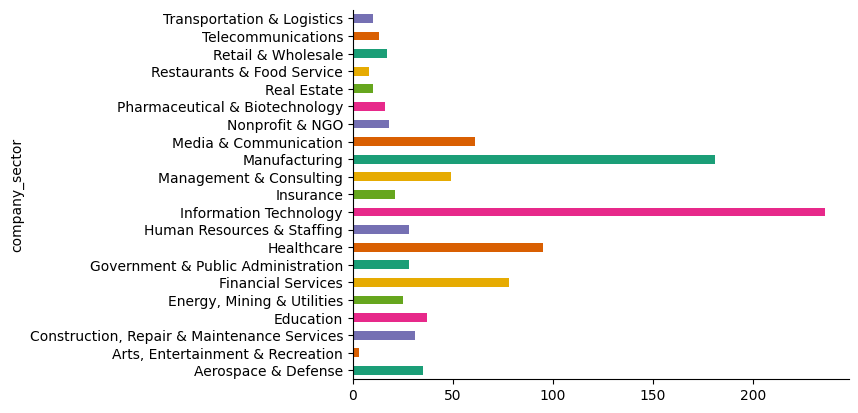

In [ ]:
# generated graph depending on employment type

new_glassdoor.groupby('company_sector').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

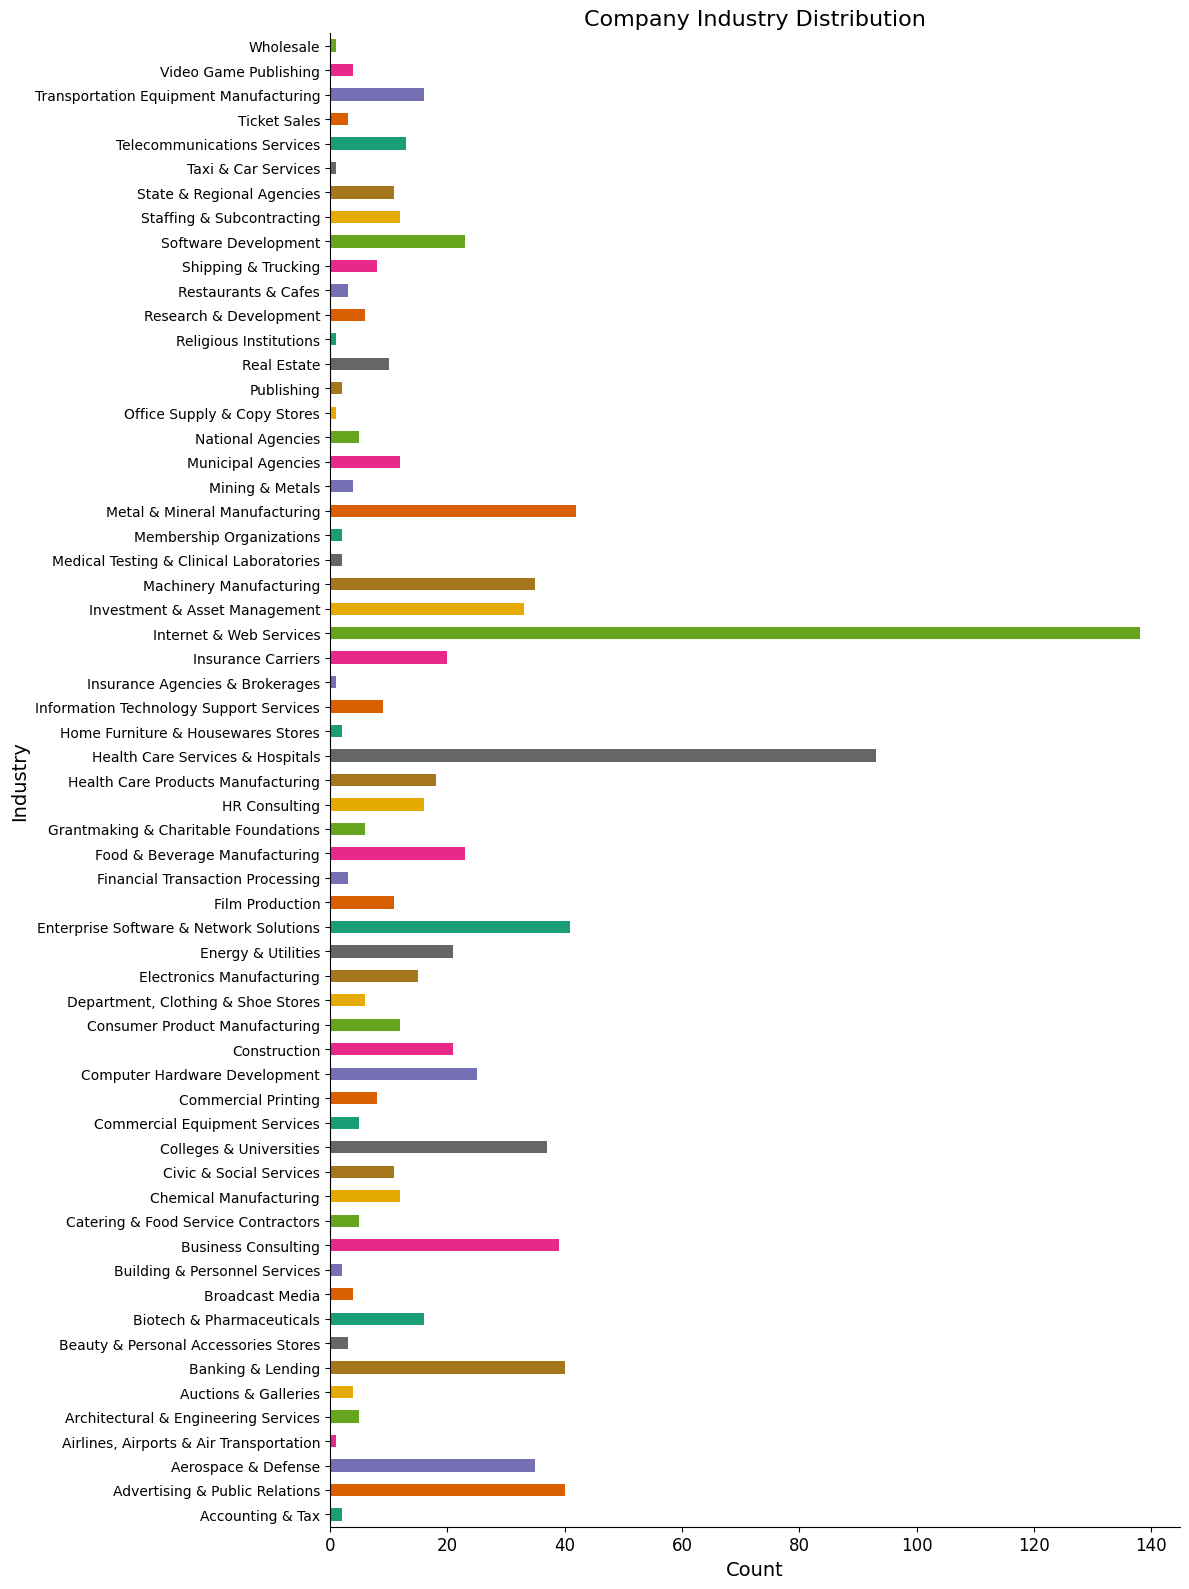

In [ ]:
# generate the bar plot with adjusted figure size and font size
plt.figure(figsize=(12, 16))
new_glassdoor.groupby('company_industry').size().plot(
    kind='barh',
    color=sns.color_palette('Dark2')
)

# adjust axis styles and label font sizes to plot the graph
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Industry", fontsize=14)
plt.title("Company Industry Distribution", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


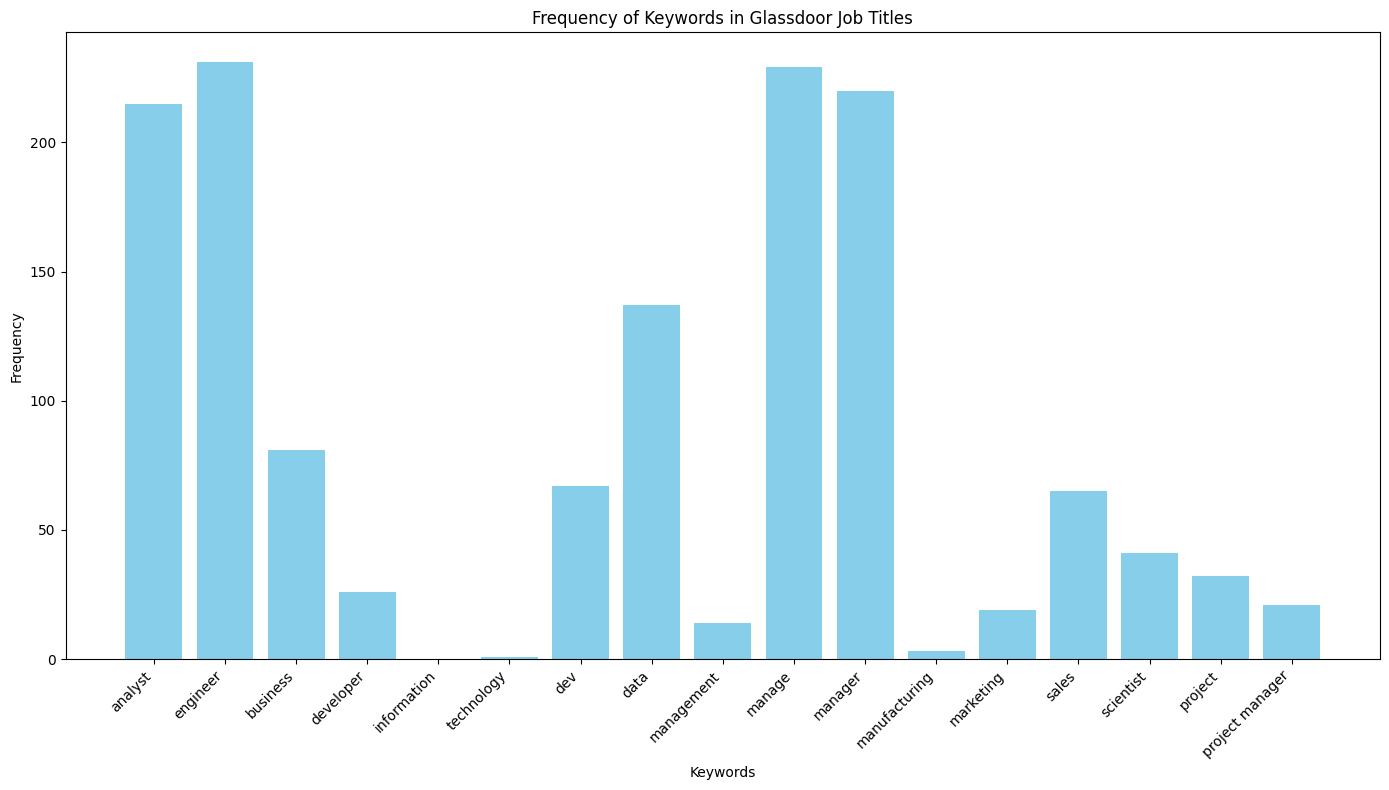

In [ ]:
# list of keywords
glassdoor_keywords = [
    "analyst", "engineer", "business", "developer", "information", "technology",
    "dev", "data", "management", "manage", "manager", "manufacturing", "marketing",
    "sales", "scientist", "project", "project manager"
]

# count the occurrences of each keyword in the job_title column of glassdoor csv
keyword_counts_glassdoor = {
    keyword: new_glassdoor['job_title'].str.contains(keyword, case=False, na=False).sum() for keyword in glassdoor_keywords
}

# convert the counts dictionary to a DataFrame for visualization
keyword_glassdoor_df = pd.DataFrame(list(keyword_counts_glassdoor.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(keyword_glassdoor_df['Keyword'], keyword_glassdoor_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Glassdoor Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

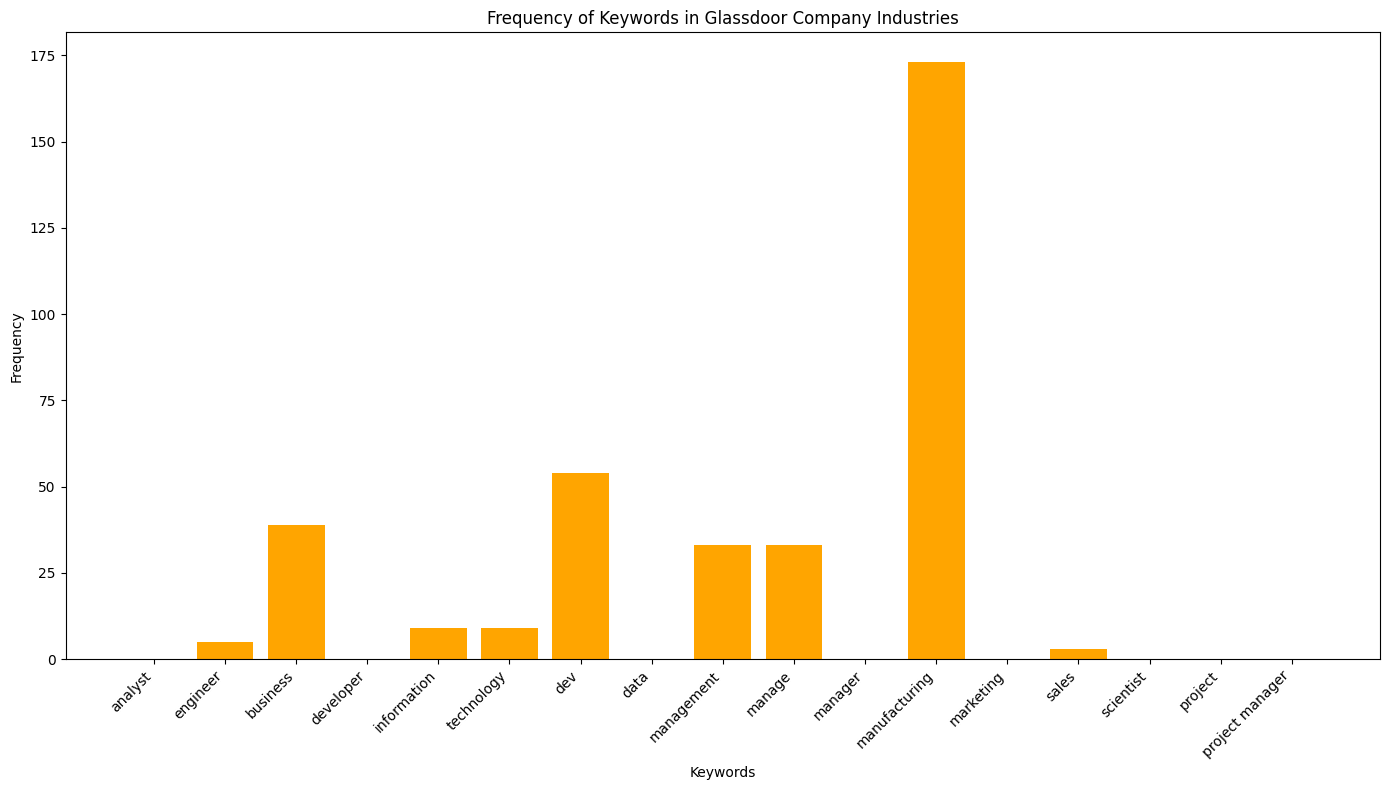

In [ ]:
# count the occurrences of each keyword in the 'company_industry' column of the glassdoor dataset
keyword_counts_industry = {
    keyword: new_glassdoor['company_industry'].str.contains(keyword, case=False, na=False).sum() for keyword in glassdoor_keywords
}

# convert the counts dictionary to a dataFrame for visualization
keyword_industry_df = pd.DataFrame(list(keyword_counts_industry.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(keyword_industry_df['Keyword'], keyword_industry_df['Count'], color='orange')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Glassdoor Company Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

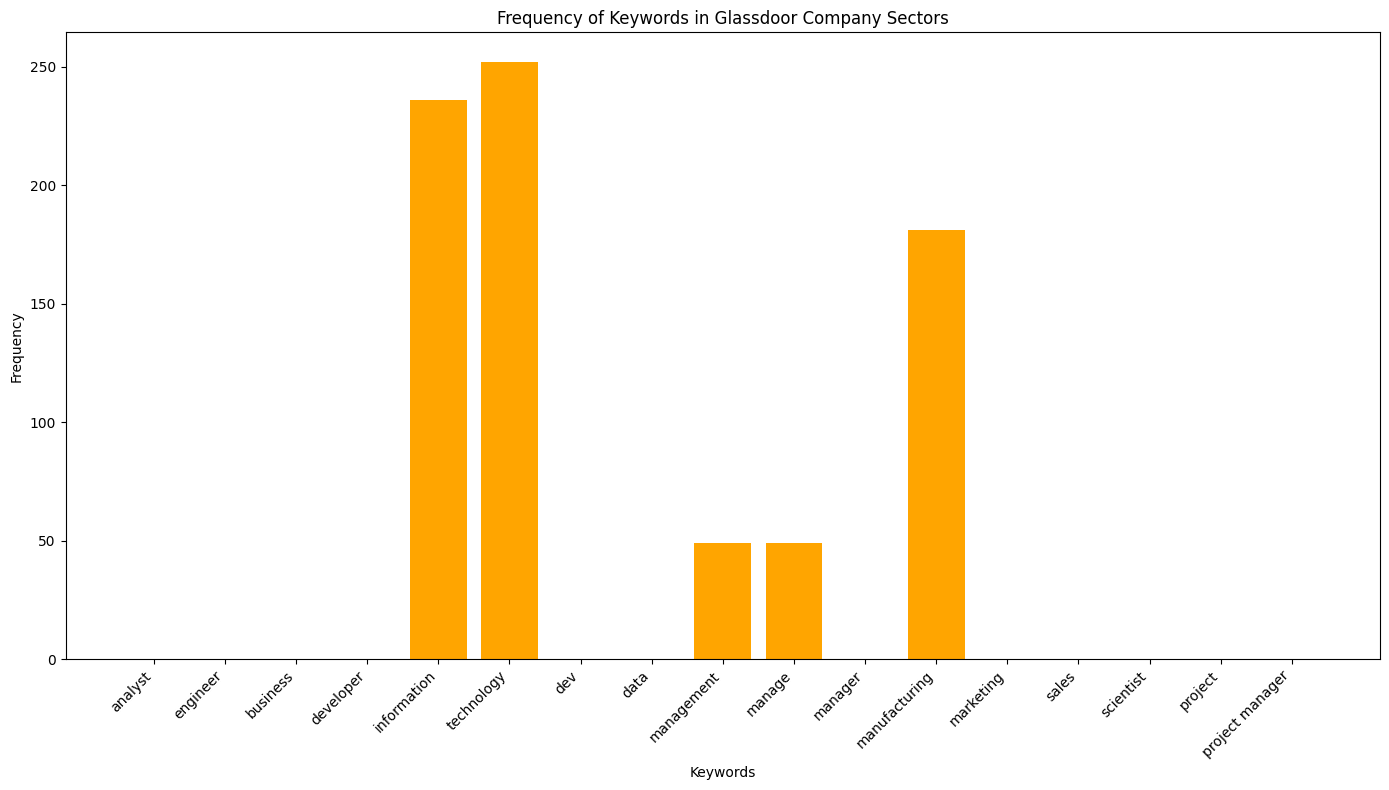

In [ ]:
# count the occurrences of each keyword in the 'company_sector' column of the glassdoor dataset
keyword_counts_sector = {
    keyword: new_glassdoor['company_sector'].str.contains(keyword, case=False, na=False).sum() for keyword in glassdoor_keywords
}

# convert the counts dictionary to a dataFrame for visualization
keyword_sector_df = pd.DataFrame(list(keyword_counts_sector.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(keyword_sector_df['Keyword'], keyword_sector_df['Count'], color='orange')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Glassdoor Company Sectors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

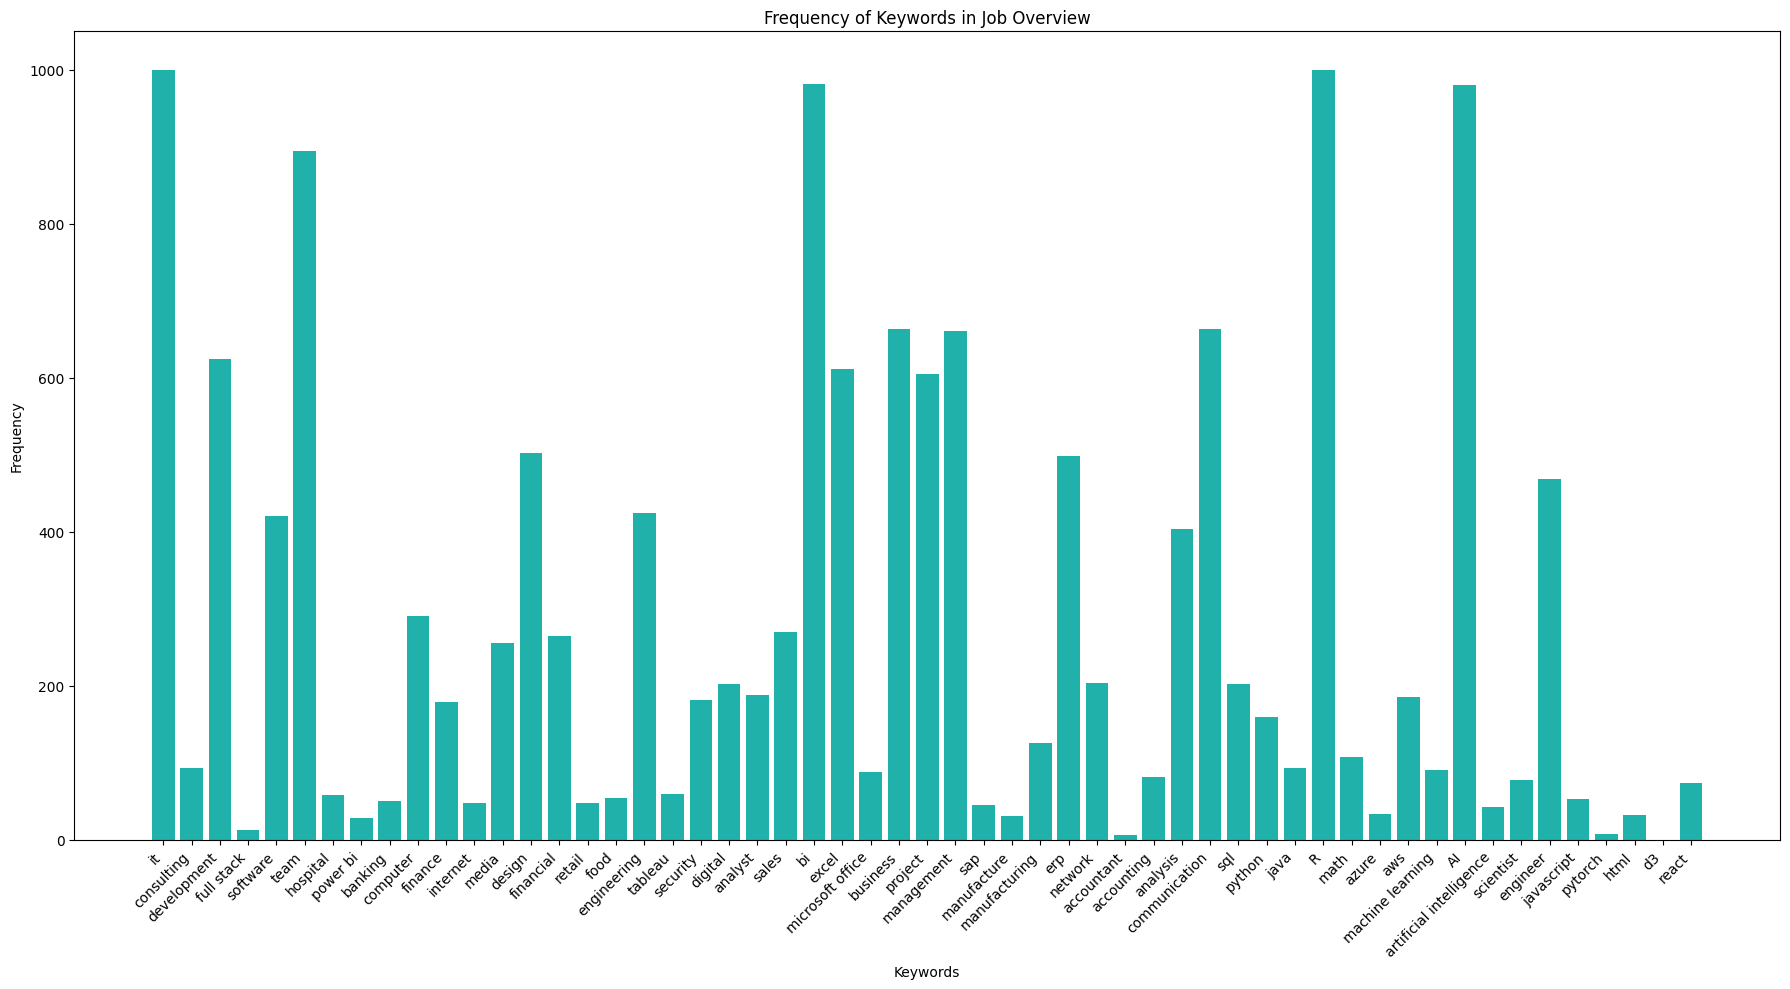

In [ ]:
# extended list of keywords for the job_overview column
overview_keywords_ext = [
    "it", "consulting", "development", "full stack", "software", "team", "hospital",
    "power bi", "banking", "computer", "finance", "internet", "media", "design",
    "finance", "financial", "retail", "food", "engineering", "tableau", "security", "digital", "analyst", "sales", "bi", "excel", "microsoft office", "analyst", "business", "project", "management",
    "sap", "manufacture", "manufacturing", "erp", "network", "accountant", "accounting", "analysis", "communication", "sql", "python", "java", "R", "math", "azure", "aws", "machine learning", "AI",
    "artificial intelligence", "scientist", "engineer", "javascript", "pytorch", "html", "d3", "react"
]

# Count the occurrences of each keyword in the 'job_overview' column
keyword_counts_over = {
    keyword: new_glassdoor['job_overview'].str.contains(keyword, case=False, na=False).sum() for keyword in overview_keywords_ext
}

# convert the counts dictionary to a dataFrame for visualization
keyword_over_df = pd.DataFrame(list(keyword_counts_over.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(18, 10))
plt.bar(keyword_over_df['Keyword'], keyword_over_df['Count'], color='lightseagreen')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Job Overview')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
